IMPORTING ALL THE IMPORTANT LIBRARIES

In [1]:
# Regression models
from sklearn.linear_model import LinearRegression

# Model slection
from sklearn.model_selection import train_test_split

# Preprocessing
from sklearn.preprocessing import StandardScaler

# Metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Visualisations

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Other
from scipy import stats
import math
import pickle

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns


## EDA on the Apples Predict Data

### Basic Analysis

We will be looking at the Apples Predict Data. Using these four commands, we will perform a basic analysis:

    - df.head()
    - df.shape
    - df.info()
    - df.describe()
    
First, we'll import the libraries we will need, followed by the data.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/ShaniPillay/regression-apples-predict-api-template/main/utils/data/train_data.csv')

In [4]:
df.head()

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
0,CAPE,EC120,1L,12.0,APPLE GRANNY SMITH,2020-03-10,108.0,112.0,3236.0,29,348.0,0,9.30
1,CAPE,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51
2,GAUTENG,AT200,1L,20.0,AVOCADO PINKERTON,2020-05-05,70.0,80.0,4860.0,66,1320.0,50,3.68
3,TRANSVAAL,BJ090,1L,9.0,TOMATOES-LONG LIFE,2020-01-20,60.0,60.0,600.0,10,90.0,0,6.67
4,WESTERN FREESTATE,PP100,1R,10.0,POTATO SIFRA (WASHED),2020-07-14,40.0,45.0,41530.0,927,9270.0,393,4.48


# check DATATYPES

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64376 entries, 0 to 64375
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Province          64376 non-null  object 
 1   Container         64376 non-null  object 
 2   Size_Grade        64376 non-null  object 
 3   Weight_Kg         64376 non-null  float64
 4   Commodities       64376 non-null  object 
 5   Date              64376 non-null  object 
 6   Low_Price         64376 non-null  float64
 7   High_Price        64376 non-null  float64
 8   Sales_Total       64376 non-null  float64
 9   Total_Qty_Sold    64376 non-null  int64  
 10  Total_Kg_Sold     64376 non-null  float64
 11  Stock_On_Hand     64376 non-null  int64  
 12  avg_price_per_kg  64376 non-null  float64
dtypes: float64(6), int64(2), object(5)
memory usage: 6.4+ MB


The data types are appropriate except for the `Date` column.Change `Date` to 'date' datatype using pd.to_datetime

The info command confirms our categorical and numerical features. If a feature (variable) is categorical the Dtype is object and if it is a numerical variable the Dtype is an int64 or float64. 

In [6]:
pd.to_datetime(df['Date'])

0       2020-03-10
1       2020-09-09
2       2020-05-05
3       2020-01-20
4       2020-07-14
           ...    
64371   2020-05-18
64372   2020-02-05
64373   2020-08-20
64374   2020-08-18
64375   2020-08-06
Name: Date, Length: 64376, dtype: datetime64[ns]

# select APPLE GOLDEN DELICIOUS and change Date to datetime data type

In [7]:
df1=df.copy()
df_Apple=df1.loc[df1['Commodities'] == 'APPLE GOLDEN DELICIOUS']

In [8]:
pd.to_datetime(df_Apple['Date'])

1       2020-09-09
7       2020-04-14
24      2020-04-16
40      2020-05-04
69      2020-09-28
           ...    
64276   2020-03-04
64291   2020-02-22
64297   2020-04-22
64304   2020-03-04
64310   2020-04-23
Name: Date, Length: 1952, dtype: datetime64[ns]

In [23]:
df_Apple

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
1,CAPE,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51
7,CAPE,JG110,2M,11.0,APPLE GOLDEN DELICIOUS,2020-04-14,50.0,50.0,16000.0,320,3520.0,0,4.55
24,W.CAPE-BERGRIVER ETC,JE090,2S,9.0,APPLE GOLDEN DELICIOUS,2020-04-16,55.0,55.0,990.0,18,162.0,1506,6.11
40,CAPE,M4183,1S,18.3,APPLE GOLDEN DELICIOUS,2020-05-04,80.0,120.0,32020.0,388,7100.4,443,4.51
69,EASTERN CAPE,IA400,1S,400.0,APPLE GOLDEN DELICIOUS,2020-09-28,1800.0,1800.0,1800.0,1,400.0,2,4.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64276,NATAL,EC120,1S,12.0,APPLE GOLDEN DELICIOUS,2020-03-04,96.0,96.0,1920.0,20,240.0,53,8.00
64291,ORANGE FREE STATE,M4183,1X,18.3,APPLE GOLDEN DELICIOUS,2020-02-22,130.0,130.0,7280.0,56,1024.8,74,7.10
64297,CAPE,JE090,2M,9.0,APPLE GOLDEN DELICIOUS,2020-04-22,50.0,60.0,4540.0,89,801.0,793,5.67
64304,CAPE,JG110,2M,11.0,APPLE GOLDEN DELICIOUS,2020-03-04,30.0,40.0,2140.0,70,770.0,0,2.78


In [24]:
df_Apple.shape

(1952, 13)

# check MISSING VALUES

In [9]:
df_Apple.isnull().sum()

Province            0
Container           0
Size_Grade          0
Weight_Kg           0
Commodities         0
Date                0
Low_Price           0
High_Price          0
Sales_Total         0
Total_Qty_Sold      0
Total_Kg_Sold       0
Stock_On_Hand       0
avg_price_per_kg    0
dtype: int64

In [10]:
df_Apple.loc[df_Apple['Date'] == '2020-09-09'] #checking date column

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
1,CAPE,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51
23966,W.CAPE-BERGRIVER ETC,JE090,2S,9.0,APPLE GOLDEN DELICIOUS,2020-09-09,55.0,55.0,110.0,2,18.0,202,6.11
27112,CAPE,M4183,1X,18.3,APPLE GOLDEN DELICIOUS,2020-09-09,160.0,170.0,4230.0,25,457.5,468,9.25
27557,CAPE,EC120,1S,12.0,APPLE GOLDEN DELICIOUS,2020-09-09,80.0,112.0,29990.0,339,4068.0,713,7.37
29663,W.CAPE-BERGRIVER ETC,JE090,2M,9.0,APPLE GOLDEN DELICIOUS,2020-09-09,52.0,55.0,4129.0,79,711.0,97,5.81
34251,W.CAPE-BERGRIVER ETC,EC120,1S,12.0,APPLE GOLDEN DELICIOUS,2020-09-09,120.0,120.0,960.0,8,96.0,854,10.00
38087,CAPE,IA400,1S,400.0,APPLE GOLDEN DELICIOUS,2020-09-09,1800.0,1800.0,5400.0,3,1200.0,0,4.50
50177,EASTERN CAPE,EC120,1S,12.0,APPLE GOLDEN DELICIOUS,2020-09-09,64.0,64.0,5632.0,88,1056.0,154,5.33
50432,W.CAPE-BERGRIVER ETC,JE090,2L,9.0,APPLE GOLDEN DELICIOUS,2020-09-09,52.0,55.0,214.0,4,36.0,176,5.94
51253,CAPE,JE090,2M,9.0,APPLE GOLDEN DELICIOUS,2020-09-09,50.0,50.0,450.0,9,81.0,9,5.56


### Univariate Analysis: Non-Graphical

The first univariate analysis will be non-graphical. This is where we will be looking at the **descriptive statistics** of each feature. We can get the descriptive statistics of each numerical feature by using the following command:

    - df.describe()

This command will provide the mean, standard deviation and a five number summary of each numerical feature.
The five number summary (Minimum, Lower Quartile (Q1) = 25%, Median (Q2) = 50%, Upper Quartile (Q3) = 75%, Maximum) is also used for creating the box plot.

Individual statistical measures can also be calculated by using the following commands:

    - df.count()
    - df.mean()
    - df.std()
    - df.min()
    - df.quantile([0.25, 0.5, 0.75], axis = 0)
    - df.median()
    - df.max()

The three measures for central tendency are the mode, mean and median. The command to determine the mode is:

    - df.mode()

In [11]:
df_Apple.describe()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
count,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000
mean,40.460912,174.307377,215.648053,20053.533811,174.510758,2960.176332,408.393955,6.778893
std,99.655169,373.553578,433.546159,39005.069445,308.810797,6097.416527,724.450582,2.248744
min,3.000000,2.000000,5.000000,5.000000,1.000000,3.000000,0.000000,0.250000
25%,9.000000,50.000000,60.000000,1325.000000,12.000000,219.600000,9.000000,5.460000
50%,12.000000,80.000000,108.000000,5495.000000,64.000000,853.500000,126.500000,6.670000
75%,18.300000,127.250000,160.000000,21082.500000,200.000000,3093.525000,468.000000,8.280000
max,400.000000,2300.000000,3300.000000,369464.000000,4237.000000,74000.000000,6400.000000,21.240000


Additional statistical measures that can be calculated are **kurtosis** and **skew**. 

Both kurtosis and skew are important statistical terms to be familiar with in data science. Kurtosis is the measure of outliers present in the data. **High kurtosis (>3)** indicates a large number of outliers and **low kurtosis (<3)** a lack of outliers.  Skew will indicate how symmetrical your data is. Below is a table that explains the range of values with regards to skew.


|   Skew Value (x)  |       Description of Data      |
|:-------------------|:---------------:|
| -0.5 < x < 0.5              |Fairly Symmetrical |
| -1 < x < -0.5 | Moderate Negative Skew  | 
| 0.5 < x < 1             | Moderate Positive Skew  | 
|       x < -1     |High Negative Skew  | 
|       x > 1  |High Positve Skew | 

<div align="left" style="width: 500px; font-size: 80%; text-align: left; margin: 0 auto">
<img src="https://github.com/Explore-AI/Pictures/blob/f3aeedd2c056ddd233301c7186063618c1041140/regression_analysis_notebook/skew.jpg?raw=True"
     alt="Dummy image 1"
     style="float: left; padding-bottom=0.5em"
     width=500px/>
     For a more detailed explanation on skew and kurtosis read <a href="https://codeburst.io/2-important-statistics-terms-you-need-to-know-in-data-science-skewness-and-kurtosis-388fef94eeaa">here</a>.
</div>


The commands used to determine the skew and kurtosis of data are:

    - df.skew()
    - df.kurtosis()

In [12]:
df_Apple.skew()


Weight_Kg           3.328254
Low_Price           4.222672
High_Price          3.828819
Sales_Total         4.250317
Total_Qty_Sold      4.445169
Total_Kg_Sold       5.529586
Stock_On_Hand       3.391815
avg_price_per_kg    0.082452
dtype: float64

The feature `avg_price_per_kg` is fairly symmetrical; the rest of the features are all highly positively skewed.

In [13]:
df_Apple.kurtosis()

Weight_Kg            9.109698
Low_Price           17.073369
High_Price          13.630768
Sales_Total         24.200524
Total_Qty_Sold      32.338123
Total_Kg_Sold       45.153801
Stock_On_Hand       14.671224
avg_price_per_kg     1.042921
dtype: float64

This indicates the presence of outliers for all features except `avg_price_per_kg`. WE NEED TO INVESTIGATE WHY THERE IS HIGH Kurtosis (many outliers)-maybe wrong data entry?

### Univariate Analysis: Graphical

You can look at the **distribution** of any numerical feature by using the following plots:

    - histogram
    - density plot
    - box plot
    - violin plot
    
For a categorical feature we will use a:

    - bar plot

#### Histogram and Density Plot

For displaying a histogram and density plot we will be using the Matplotlib library and create a list of all numerical features to visualise these features at the same time.

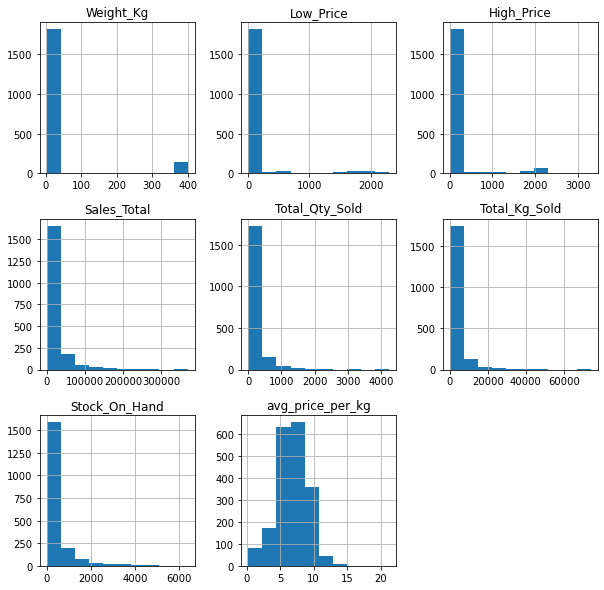

In [14]:
features = ['Weight_Kg','Low_Price', 'High_Price', 'Sales_Total','Total_Qty_Sold','Total_Kg_Sold','Stock_On_Hand','avg_price_per_kg'] # create a list of all numerical features
df_Apple[features].hist(figsize=(10,10));

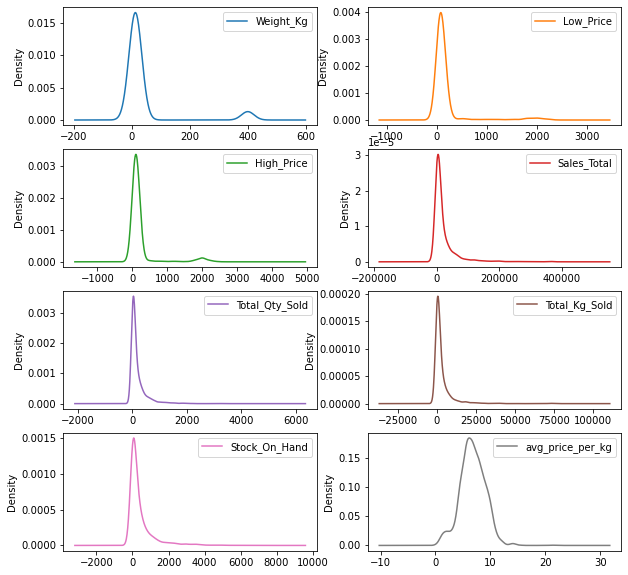

In [47]:
df_Apple[features].plot(kind='density', subplots=True, layout=(4, 2), sharex=False, figsize=(10, 10));

We can clearly see that both the histogram and density plot display the same information. The density plot can be considered a smoothed version of the histogram and does not depend on the size of bins.

#### Box Plot and Violin Plot

For the Box Plot and Violin Plot, we will use the seaborn library and only select one feature instead of all the numerical features. We can visualise all numerical features simultaneously, but as the range of values for each feature is different, it will not create a useful visualisation. Standardisation or normalisation can be applied to a feature to adjust the range, but we will not apply it in this notebook. Further reading on standardisation and normalisation can be done <a href="https://medium.com/@dataakkadian/standardization-vs-normalization-da7a3a308c64">here</a>.

The `Total_Qty_Sold` feature will be used.

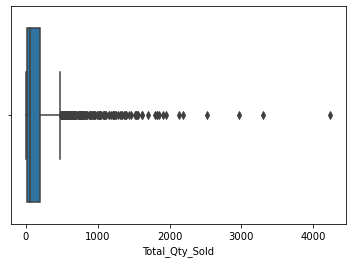

In [51]:
sns.boxplot(x='Total_Qty_Sold', data=df_Apple);

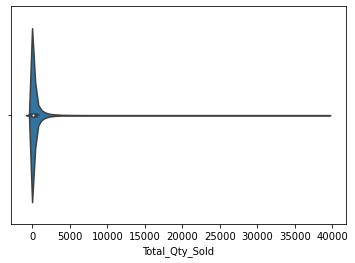

In [53]:
sns.violinplot(x='Total_Qty_Sold', data=df);

Although both the box plot and violin plot display the distribution of the data, the boxplot provides certain statistics that are useful. 

The five vertical lines in the boxplot provide the information of the five number summary and the dots on the right hand side of the graph is a display of outliers. The violin plot focuses more on a smoothed distribution.

#### Bar Plot

For the categorical features, we can create a **bar plot** to display the frequency distribution. 

We'll generate a bar plot of the `Size_Grade` feature, where each bar represents a unique number of Size_Grade from the data, and the height represents how many times that number of Size_Grade occurred. This can be done by using seaborn's `countplot`. 

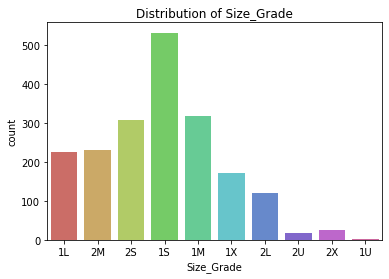

In [15]:
sns.countplot(x = 'Size_Grade', data = df_Apple, palette="hls")
plt.title("Distribution of Size_Grade");

### Multivariate Analysis: Non-Graphical 

For this analysis, we can determine the relationship between any two numerical features by calculating the correlation coefficient. Correlation is a measure of the degree to which two variables change together, if at all. If two features have a strong positive correlation, it means that if the value of one feature increases, the value of the other feature also increases. There are three different correlation measures:

    - Pearson correlation 
    - Spearman rank correlation
    - Kendall correlation

For this lesson, we will focus on the Pearson correlation. The Pearson correlation measures the linear relationship between features and assumes that the features are normally distributed. Below is a table that explains how to interpret the Pearson correlation measure:


|   Pearson Correlation Coefficient (r)  |       Description of Relationship     |
|:-------------------|:---------------:|
|  r = -1              |Perfect Negative Correlation |
| -1 < r < -0.8 | Strong Negative Correlation  | 
| - 0.8 < r < -0.5             | Moderate Negative Correlation  | 
|       - 0.5 < r < 0     |Weak Negative Correlation  | 
|       r = 0  |No Linear Correlation | 
| 0 < r < 0.5 | Weak Positive Correlation  | 
| 0.5 < r < 0.8             | Moderate Positive Correlation  | 
|       0.8 < r < 1     |Strong Positive Correlation  | 
|       r = 1  |Perfect Positive Correlation | 


<div align="left" style="width: 800px; text-align: left;">
<img src="https://github.com/Explore-AI/Pictures/blob/f3aeedd2c056ddd233301c7186063618c1041140/regression_analysis_notebook/pearson_corr.jpg?raw=True"
     alt="Pearson Correlation"
     style="padding-bottom=0.5em"
     width=800px/>
</div>

For a more detailed explanation of correlations, read <a href="https://medium.com/fintechexplained/did-you-know-the-importance-of-finding-correlations-in-data-science-1fa3943debc2#:~:text=Correlation%20is%20a%20statistical%20measure,to%20forecast%20our%20target%20variable.&text=It%20means%20that%20when%20the,variable(s)%20also%20increases.">here</a>.

The command we will use to determine the correlation between features is:

    - df.corr()

In [16]:
df_Apple.corr()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
Weight_Kg,1.000000,0.863182,0.905852,0.180518,-0.133317,0.294117,-0.144105,-0.337886
Low_Price,0.863182,1.000000,0.938140,0.183230,-0.122823,0.269744,-0.127677,-0.141740
High_Price,0.905852,0.938140,1.000000,0.265672,-0.096456,0.372282,-0.094174,-0.164496
Sales_Total,0.180518,0.183230,0.265672,1.000000,0.771865,0.962338,0.284693,0.108473
Total_Qty_Sold,-0.133317,-0.122823,-0.096456,0.771865,1.000000,0.651440,0.390168,0.087536
Total_Kg_Sold,0.294117,0.269744,0.372282,0.962338,0.651440,1.000000,0.229062,-0.001007
Stock_On_Hand,-0.144105,-0.127677,-0.094174,0.284693,0.390168,0.229062,1.000000,0.105028
avg_price_per_kg,-0.337886,-0.141740,-0.164496,0.108473,0.087536,-0.001007,0.105028,1.000000


To look at a two of the correlations between different features:

    - Weight_Kg	 & High_Price = Strong Positive Correlation
    - Low_Price & Total_Qty_Sold = Weak Negative Correlation

### Multivariate Analysis: Graphical

For the multivariate graphical analysis the following visualisations will be considered:

    - Heatmap
    - Scatter Plot
    - Pair Plot
    - Joint Plot
    - Bubble Plot
    
#### Heatmap

The relationship between features can also be displayed graphically using a **heatmap**. The Seaborn library will be used for this basic heatmap visualisation. 

To see how different heatmap variations can be created, read <a href="https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e">here</a>.

The correlation coefficient value will be displayed on the heatmap using the `vmin` and `vmax` parameters.

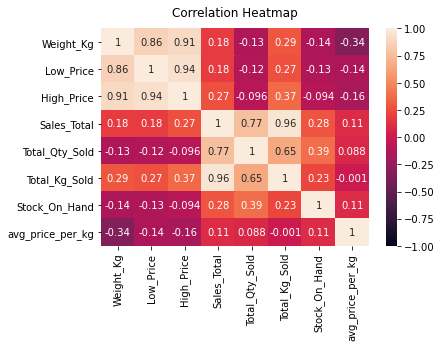

In [17]:
heatmap = sns.heatmap(df_Apple.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

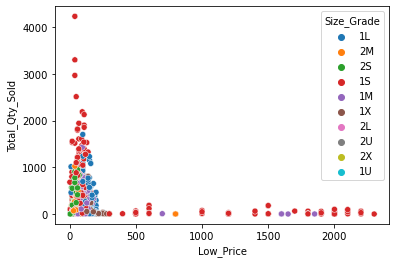

In [18]:
sns.scatterplot(x='Low_Price',y='Total_Qty_Sold',hue='Size_Grade', data=df_Apple);   

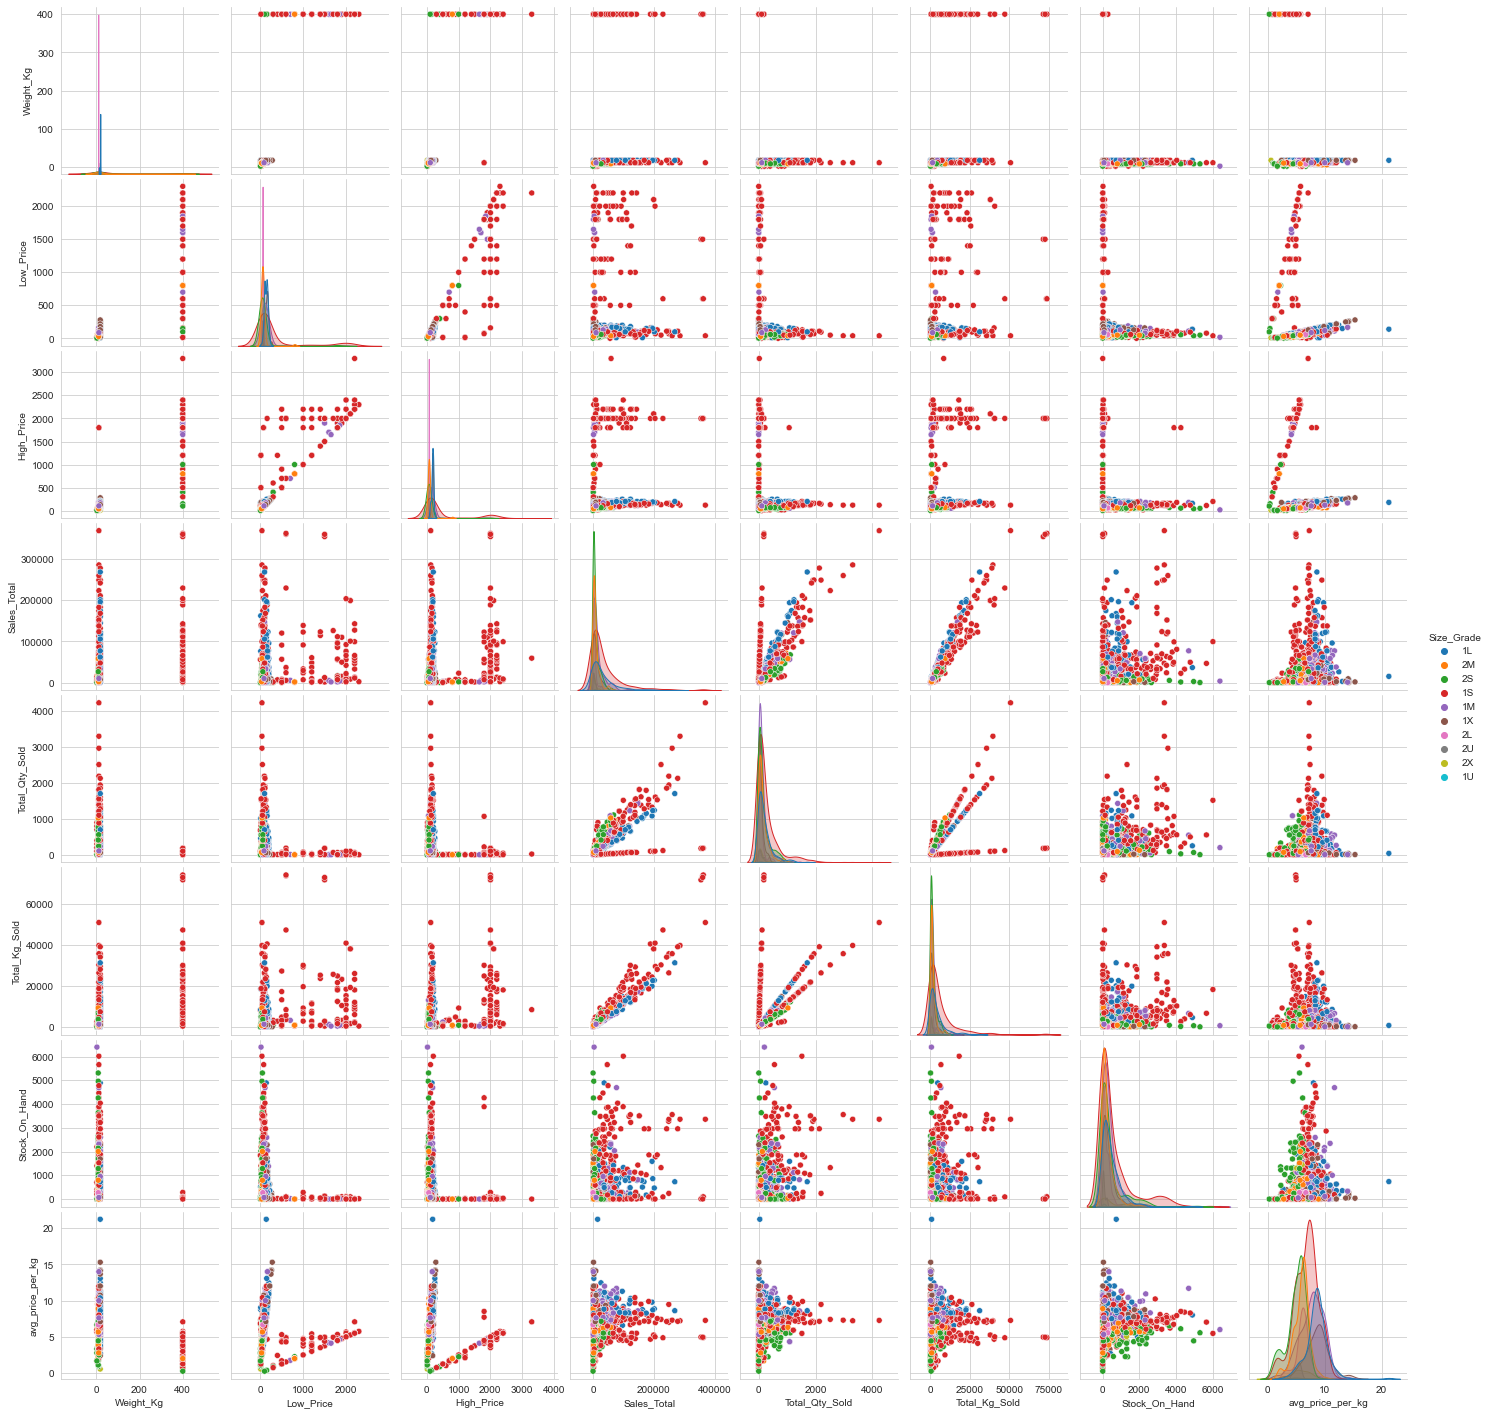

In [19]:
sns.set_style("whitegrid");
sns.pairplot(df_Apple, hue="Size_Grade");
plt.show();

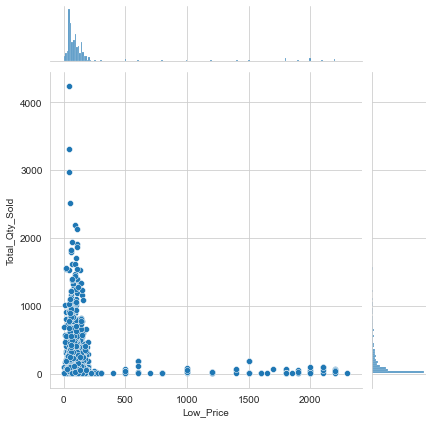

In [20]:
sns.jointplot(x = 'Low_Price', y = 'Total_Qty_Sold', data = df_Apple);

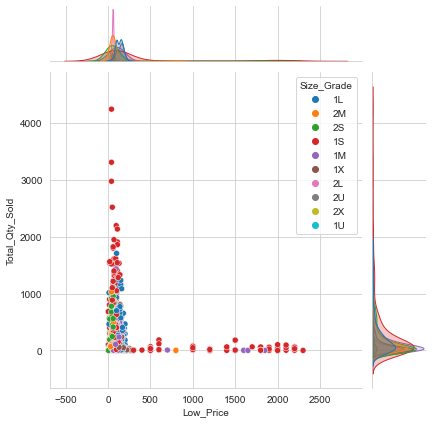

In [21]:
sns.jointplot(x = 'Low_Price', y = 'Total_Qty_Sold', data = df_Apple, hue='Size_Grade');

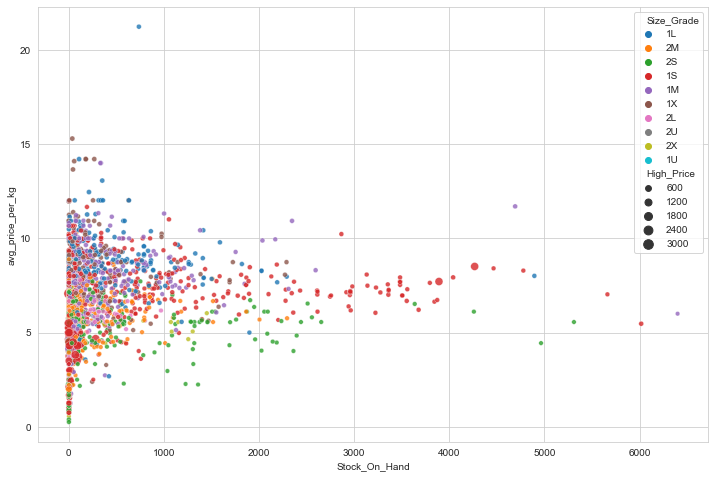

In [22]:
plt.figure(figsize=(12,8))
sns.scatterplot(x="Stock_On_Hand", 
                y="avg_price_per_kg",
                size="High_Price",
                sizes=(20,100),
                alpha=0.8,
                hue="Size_Grade",
                data=df_Apple);

# Model Building

In [40]:
#viewing the data
df_Apple.head(10)

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
1,CAPE,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51
7,CAPE,JG110,2M,11.0,APPLE GOLDEN DELICIOUS,2020-04-14,50.0,50.0,16000.0,320,3520.0,0,4.55
24,W.CAPE-BERGRIVER ETC,JE090,2S,9.0,APPLE GOLDEN DELICIOUS,2020-04-16,55.0,55.0,990.0,18,162.0,1506,6.11
40,CAPE,M4183,1S,18.3,APPLE GOLDEN DELICIOUS,2020-05-04,80.0,120.0,32020.0,388,7100.4,443,4.51
69,EASTERN CAPE,IA400,1S,400.0,APPLE GOLDEN DELICIOUS,2020-09-28,1800.0,1800.0,1800.0,1,400.0,2,4.50
80,CAPE,JE090,2S,9.0,APPLE GOLDEN DELICIOUS,2020-03-13,55.0,55.0,4840.0,88,792.0,181,6.11
117,CAPE,EC120,1M,12.0,APPLE GOLDEN DELICIOUS,2019-12-30,100.0,100.0,1200.0,12,144.0,119,8.33
122,CAPE,JG110,2M,11.0,APPLE GOLDEN DELICIOUS,2020-08-05,70.0,70.0,5600.0,80,880.0,0,6.36
126,NATAL,IA400,2M,400.0,APPLE GOLDEN DELICIOUS,2020-07-21,800.0,800.0,1600.0,2,800.0,0,2.00
162,W.CAPE-BERGRIVER ETC,EC120,1S,12.0,APPLE GOLDEN DELICIOUS,2020-04-22,104.0,104.0,2392.0,23,276.0,0,8.67


- dependent variable (y) = avg_price_per_kg
- independent variable (x) = stock_on_hand

We say y is a function of x. This means y depends on or is determined by x.
Therefore avg_price_per_kg is a function of stock on hand

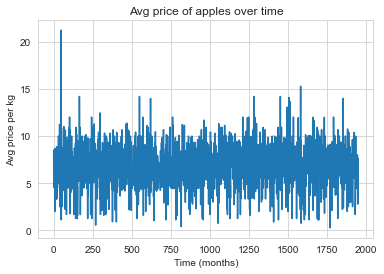

In [43]:
#plotting data
#average price of apples over time
plt.plot(np.arange(len(df_Apple.avg_price_per_kg)), df_Apple.avg_price_per_kg)
plt.title("Avg price of apples over time")
plt.xlabel("Time (months)")
plt.ylabel("Avg price per kg")
plt.show()

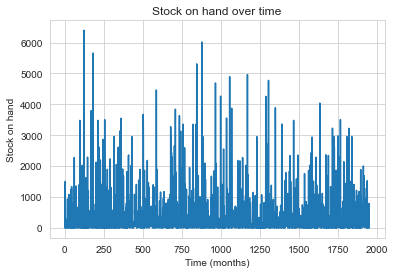

In [45]:
#plotting data
#stock on hand over time
plt.plot(np.arange(len(df_Apple.Stock_On_Hand)), df_Apple.Stock_On_Hand)
plt.title("Stock on hand over time")
plt.xlabel("Time (months)")
plt.ylabel("Stock on hand")
plt.show()

# Advanced plotting
Let's try and create something a little more visually appealing than the two plots above.

- We'll plot both dependent data series on the same graph;
- We'll assign two separate y-axes: one for each series;
- We'll display a legend near the top of the plot.

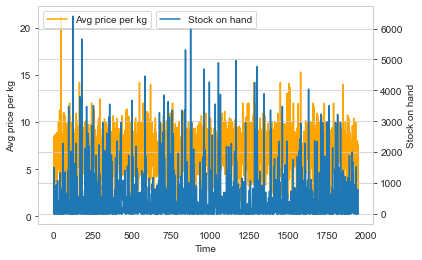

In [46]:
rc('mathtext', default='regular')
# Create blank figure
fig = plt.figure()

# Split figure to allow two sets of y axes
ax = fig.add_subplot(111)

# Plot the first line on its axis
ax.plot(np.arange(len(df_Apple.avg_price_per_kg)), df_Apple.avg_price_per_kg, '-', label = 'Avg price per kg', color='orange')

# Create second y axis and plot second line
ax2 = ax.twinx()
ax2.plot(np.arange(len(df_Apple.Stock_On_Hand)), df_Apple.Stock_On_Hand, '-', label = 'Stock on hand')

# Add legends for each axis
ax.legend(loc=2)
ax2.legend(loc=9)

ax.grid()

# Set labels of axes
ax.set_xlabel("Time")
ax.set_ylabel("Avg price per kg")
ax2.set_ylabel("Stock on hand")
plt.show()

# Regression

From the data above, too many variables are shown. Making it difficult to interpret the data.
We have:
    - dependent variable (y) = average price of apples per kg
    - independent variable (x) = stock on hand
    - time = in months
    
Let's try and show the relationship between the two variables using a scatter plot.


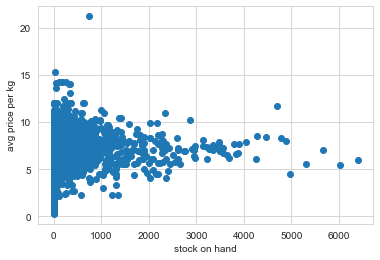

In [47]:
#scatter plot
plt.scatter(df_Apple['Stock_On_Hand'], df_Apple['avg_price_per_kg'])
plt.ylabel("avg price per kg")
plt.xlabel("stock on hand")
plt.show()

From the plot above, we can see that there possibly exists a linear relationship between the two variables: Avg price per apples and Stock on hand.

# Finding the Best Line of Fit

In [51]:
#calc slope
slope = 4/5000
print(slope)


0.0008


#calc intercep
For the intercept, we'll just take a guess and say it is 8

Let's plot a line with values of  a=8 , and  b=0.0008 :

First, we will need to generate some values of y using the following formula:

y^i=a+bxi

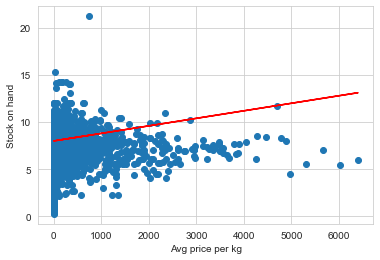

In [81]:
# Define a function to generate values of y from a list of x, 
# Given parameters a and b

def gen_y(x_list, a, b):
    y_gen = []
    for x_i in x_list:
        y_i = a + b*x_i
        y_gen.append(y_i)

    return(y_gen)

# Generate the values by invoking the 'gen_y' function
y_gen = gen_y(df_Apple.Stock_On_Hand, 8, 0.0008)

# Plot the results
plt.scatter(df_Apple.Stock_On_Hand, df_Apple.avg_price_per_kg)  # Plot the original data
plt.plot(df_Apple.Stock_On_Hand, y_gen, color='red')  # Plot the line connecting the generated y-values
plt.ylabel("Stock on hand")
plt.xlabel("Avg price per kg")
plt.show()

In [82]:
#calculate the error of each generated value of y:
errors = np.array(df_Apple.avg_price_per_kg - y_gen)
np.round(errors, 2)

array([-0.15, -3.45, -3.09, ..., -2.96, -5.22, -0.44])

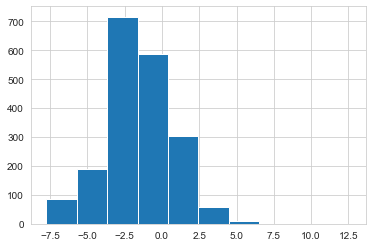

In [83]:
#plot errors on histogram
plt.hist(errors)
plt.show()

In addition to having some very large errors, we can also see that most of the errors are positive numbers. Ideally, we want our errors to be evenly distributed either side of zero - we want our line to best fit the data, i.e. no bias.

We can measure the overall error of the fit by calculating the Residual Sum of Squares:

RSS=∑i=1n(yi−y^i)2
 
The RSS finds the difference between the y-value of each data point and our estimated line (which may be either negative or positive), squares the difference, and then adds all the differences up. In other words, it's the sum of the squares of all the errors we calculated before.

In [84]:
print("Residual sum of squares:", (errors ** 2).sum())

Residual sum of squares: 14663.63851872


# Least Squares Method
Least Squares is another method that allows us to find the line of best fit while enforcing the constraint of minimising the residuals. More specifically, the Least Squares Criterion states that the sum of the squares of the residuals should be minimized, i.e.
Q=∑i=1n(yi−y^i)2
 
The formulae for the intercept,  a , and the slope,  b , are determined by minimizing the equation for the sum of the squared prediction errors:
Q=∑i=1n(yi−(a+bxi))2
 
Optimal values for  a  and  b  are found by differentiating  Q  with respect to  a  and  b , setting both equal to 0 and then solving for  a  and  b .

the equations for  a  and  b  are:

b=∑ni=1(xi−x¯)(yi−y¯)∑ni=1(xi−x¯)2
 
and:

a=y¯−bx¯
 
where  y¯  and  x¯  are the mean values of  y  and  x  in our dataset, respectively.

Let's calculate these values in Python! We'll call a the intercept and b the slope.

In [85]:
X = df_Apple.Stock_On_Hand.values
Y = df_Apple.avg_price_per_kg.values

# Calculate x bar, y bar
x_bar = np.mean(X)
y_bar = np.mean(Y)

# Calculate slope
b = sum( (X-x_bar)*(Y-y_bar) ) / sum( (X-x_bar)**2 )

# Calculate intercept
a = y_bar - b*x_bar

print("Slope = " + str(b))
print("Intercept = " + str(a))

Slope = 0.00032601289785522553
Intercept = 6.645751745913566


Now we'll plot the line we've just calculated the coefficients for.

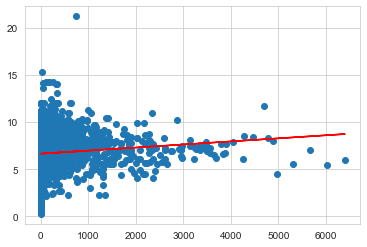

In [87]:
# Use the function we created earlier:
# it generates y-values for given x-values based on parameters a, b
y_gen2 = gen_y(df_Apple.Stock_On_Hand, a, b)

plt.scatter(df_Apple.Stock_On_Hand, df_Apple.avg_price_per_kg)
plt.plot(df_Apple.Stock_On_Hand, y_gen2, color='red')
plt.show()

In a list called errors2, we'll store the new error values.

In [88]:
errors2 = np.array(y_gen2 - df_Apple.avg_price_per_kg)
print(np.round(errors2, 2))

[-1.6   2.1   1.03 ...  1.23  3.87 -0.94]


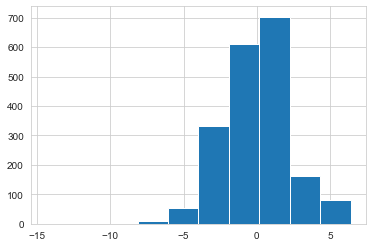

In [89]:
#plot errors on histogram
plt.hist(errors2)
plt.show()

In [90]:
print("Residual sum of squares:", (errors2 ** 2).sum())

Residual sum of squares: 9757.088078374198


Here we can see our RSS has improved from ~14663 down to ~9757.

Furthermore, if we calculate the sum of the errors we find that the value is close to 0.

In [91]:
# Round off to 11 decimal places
np.round(errors2.sum(),11)

-0.0

Intuitively, this should make sense as it is an indication that the sum of the positive errors is equal to the sum of the negative errors. 

The line fits in the 'middle' of the data.

# Linear Regression in Sklearn

In [93]:
#loading the LinearRegression library.
from sklearn.linear_model import LinearRegression

In [94]:
#We're going to need to create a LinearRegression() object, so let's first take a look at the documentation for that object:
LinearRegression?


In [96]:
#Let's create a LinearRegression() object with all the default parameters.
lm = LinearRegression()


At this stage, all we have done is initialise a model of the form:  y=a+bx 

But we haven't fitted the model i.e. used the data to calculate the model parameters  a  and  b .

# Fitting the linear model

With the object created, we will then need to fit the model to our data. This is done using the .fit() function.

In [97]:
#fit the model in the data
lm.fit?


In [98]:
# convert shape of X from (n,) to (n,1)
X = df_Apple.Stock_On_Hand[:,np.newaxis]

In [99]:
lm.fit(X, df_Apple.avg_price_per_kg)

LinearRegression()

In [100]:
#model parameters
a = float(lm.intercept_)

In [101]:
b = lm.coef_

In [102]:
print("Slope:\t\t", b)
print("Intercept:\t", float(a))

Slope:		 [0.00032601]
Intercept:	 6.645751745913565


# Model predictions

To obtain  y  values from our linear regression model we use the .predict() function. Given an array of  x  values, this function evaluates the fitted model at those  x  values and returns the corresponding  y  values. Note that in this case, the .predict() function does exactly what the gen_y() function we created earlier does. 

In [103]:
# generate values of y from x, using the linear model
gen_y = lm.predict(X)

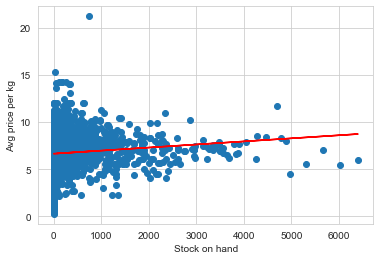

In [104]:
# plot the results
plt.scatter(X, df_Apple.avg_price_per_kg)  # plot the original data
plt.plot(X, gen_y, color='red')  # plot the line connecting the generated y-values
plt.ylabel("Avg price per kg")
plt.xlabel("Stock on hand")
plt.show()

# Assessing the model accuracy
We can measure the overall error of the fit by calculating the Residual Sum of Squares:

RSS=∑i=1n(yi−y^i)2

In [105]:
print("Residual sum of squares:", ((gen_y - df_Apple.avg_price_per_kg) ** 2).sum())


Residual sum of squares: 9757.0880783742


# Sklearn error metrics


Sklearn also has implementations of common error metrics which will make things easier for us to assess the fit of our model.

In addition to RSS, there are some other metrics we can use:

Mean Squared Error:
MSE=RSSn
 

MSE=1n∑i=1n(yi−y^i)2
 
R squared:
R2=1−RSSTSS
 

R2=1−∑(yi−y^i)2∑(yi−y¯)2
 
We can compute these metrics using Sklearn as follows:

In [106]:
from sklearn import metrics

In [107]:
print('MSE:', metrics.mean_squared_error(df_Apple.avg_price_per_kg, gen_y))

MSE: 4.998508236872029


In [108]:
# Multiple MSE by N to get RSS
print("Residual sum of squares:", metrics.mean_squared_error(df_Apple.avg_price_per_kg, gen_y)*len(X))

Residual sum of squares: 9757.0880783742


In [109]:
#r squared formula
print('R_squared:', metrics.r2_score(df_Apple.avg_price_per_kg, gen_y))


R_squared: 0.011030797375790491
